In [17]:
import matplotlib.pyplot as plt
import networkx as nx
import community.community_louvain as community_louvain  # Explicit import to avoid conflicts
from collections import defaultdict
import random
import os
import random
from collections import defaultdict, Counter
from community import community_louvain
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [27]:
# Define the path to the GEXF file
file_path = r'./../networks/One_Piece.gexf'  # Replace with the actual path to your file

# Load the graph from the GEXF file
G = nx.read_gexf(file_path)

#random seed
random.seed(42)

# Perform Louvain community detection
louvain_partition = community_louvain.best_partition(G, resolution=1)

# Group nodes by their community
communities_louvain = defaultdict(list)
for node, community in louvain_partition.items():
    communities_louvain[community].append(node)

# Get the number of communities and sizes
num_louvain_communities = len(communities_louvain)
louvain_community_sizes = [len(nodes) for nodes in communities_louvain.values()]

# Group nodes by their community
communities_louvain = defaultdict(list)
for node, community in louvain_partition.items():
    communities_louvain[community].append(node)

# Output the results
print(f"Number of Communities: {num_louvain_communities}")
print("Sizes of the communities:")
for i, size in enumerate(louvain_community_sizes, 1):
    print(f"- Community {i}: {size}")

Number of Communities: 158
Sizes of the communities:
- Community 1: 10
- Community 2: 99
- Community 3: 167
- Community 4: 1
- Community 5: 3
- Community 6: 1
- Community 7: 60
- Community 8: 2
- Community 9: 1
- Community 10: 54
- Community 11: 80
- Community 12: 1
- Community 13: 101
- Community 14: 1
- Community 15: 71
- Community 16: 1
- Community 17: 123
- Community 18: 8
- Community 19: 2
- Community 20: 1
- Community 21: 1
- Community 22: 1
- Community 23: 31
- Community 24: 15
- Community 25: 4
- Community 26: 1
- Community 27: 1
- Community 28: 1
- Community 29: 1
- Community 30: 2
- Community 31: 1
- Community 32: 1
- Community 33: 1
- Community 34: 1
- Community 35: 1
- Community 36: 1
- Community 37: 3
- Community 38: 1
- Community 39: 3
- Community 40: 26
- Community 41: 1
- Community 42: 3
- Community 43: 1
- Community 44: 4
- Community 45: 1
- Community 46: 1
- Community 47: 1
- Community 48: 2
- Community 49: 1
- Community 50: 2
- Community 51: 3
- Community 52: 1
- Com

In [29]:
communities_louvain[0]

['A O',
 'Whitey Bay',
 'Ramba',
 'Bizarre',
 'Palms',
 'Decalvan Brothers',
 'Elmy',
 'Edward Weevil',
 'Dalmatian',
 'Ratel']

In [20]:
# cleaning the text

# Function to lemmatize each word based on its part of speech
def lemmatize_word(word):
    lemmatizer = WordNetLemmatizer()
    return lemmatizer.lemmatize(word)

# Function to process the content text
def process_text(content, lemmatize=False):
    # Tokenize the content into individual words
    tokens = word_tokenize(content)
    
    # Remove punctuation and convert to lower case
    tokens = [word.lower() for word in tokens if word.isalpha()]
    
    # Lemmatize the tokens if required
    if lemmatize:
        tokens = [lemmatize_word(word) for word in tokens]
    
    # Filter out rare words that appear less than 5 times
    token_counts = Counter(tokens)
    tokens = [word for word in tokens if token_counts[word] >= 5]

    # Filter out stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    return tokens

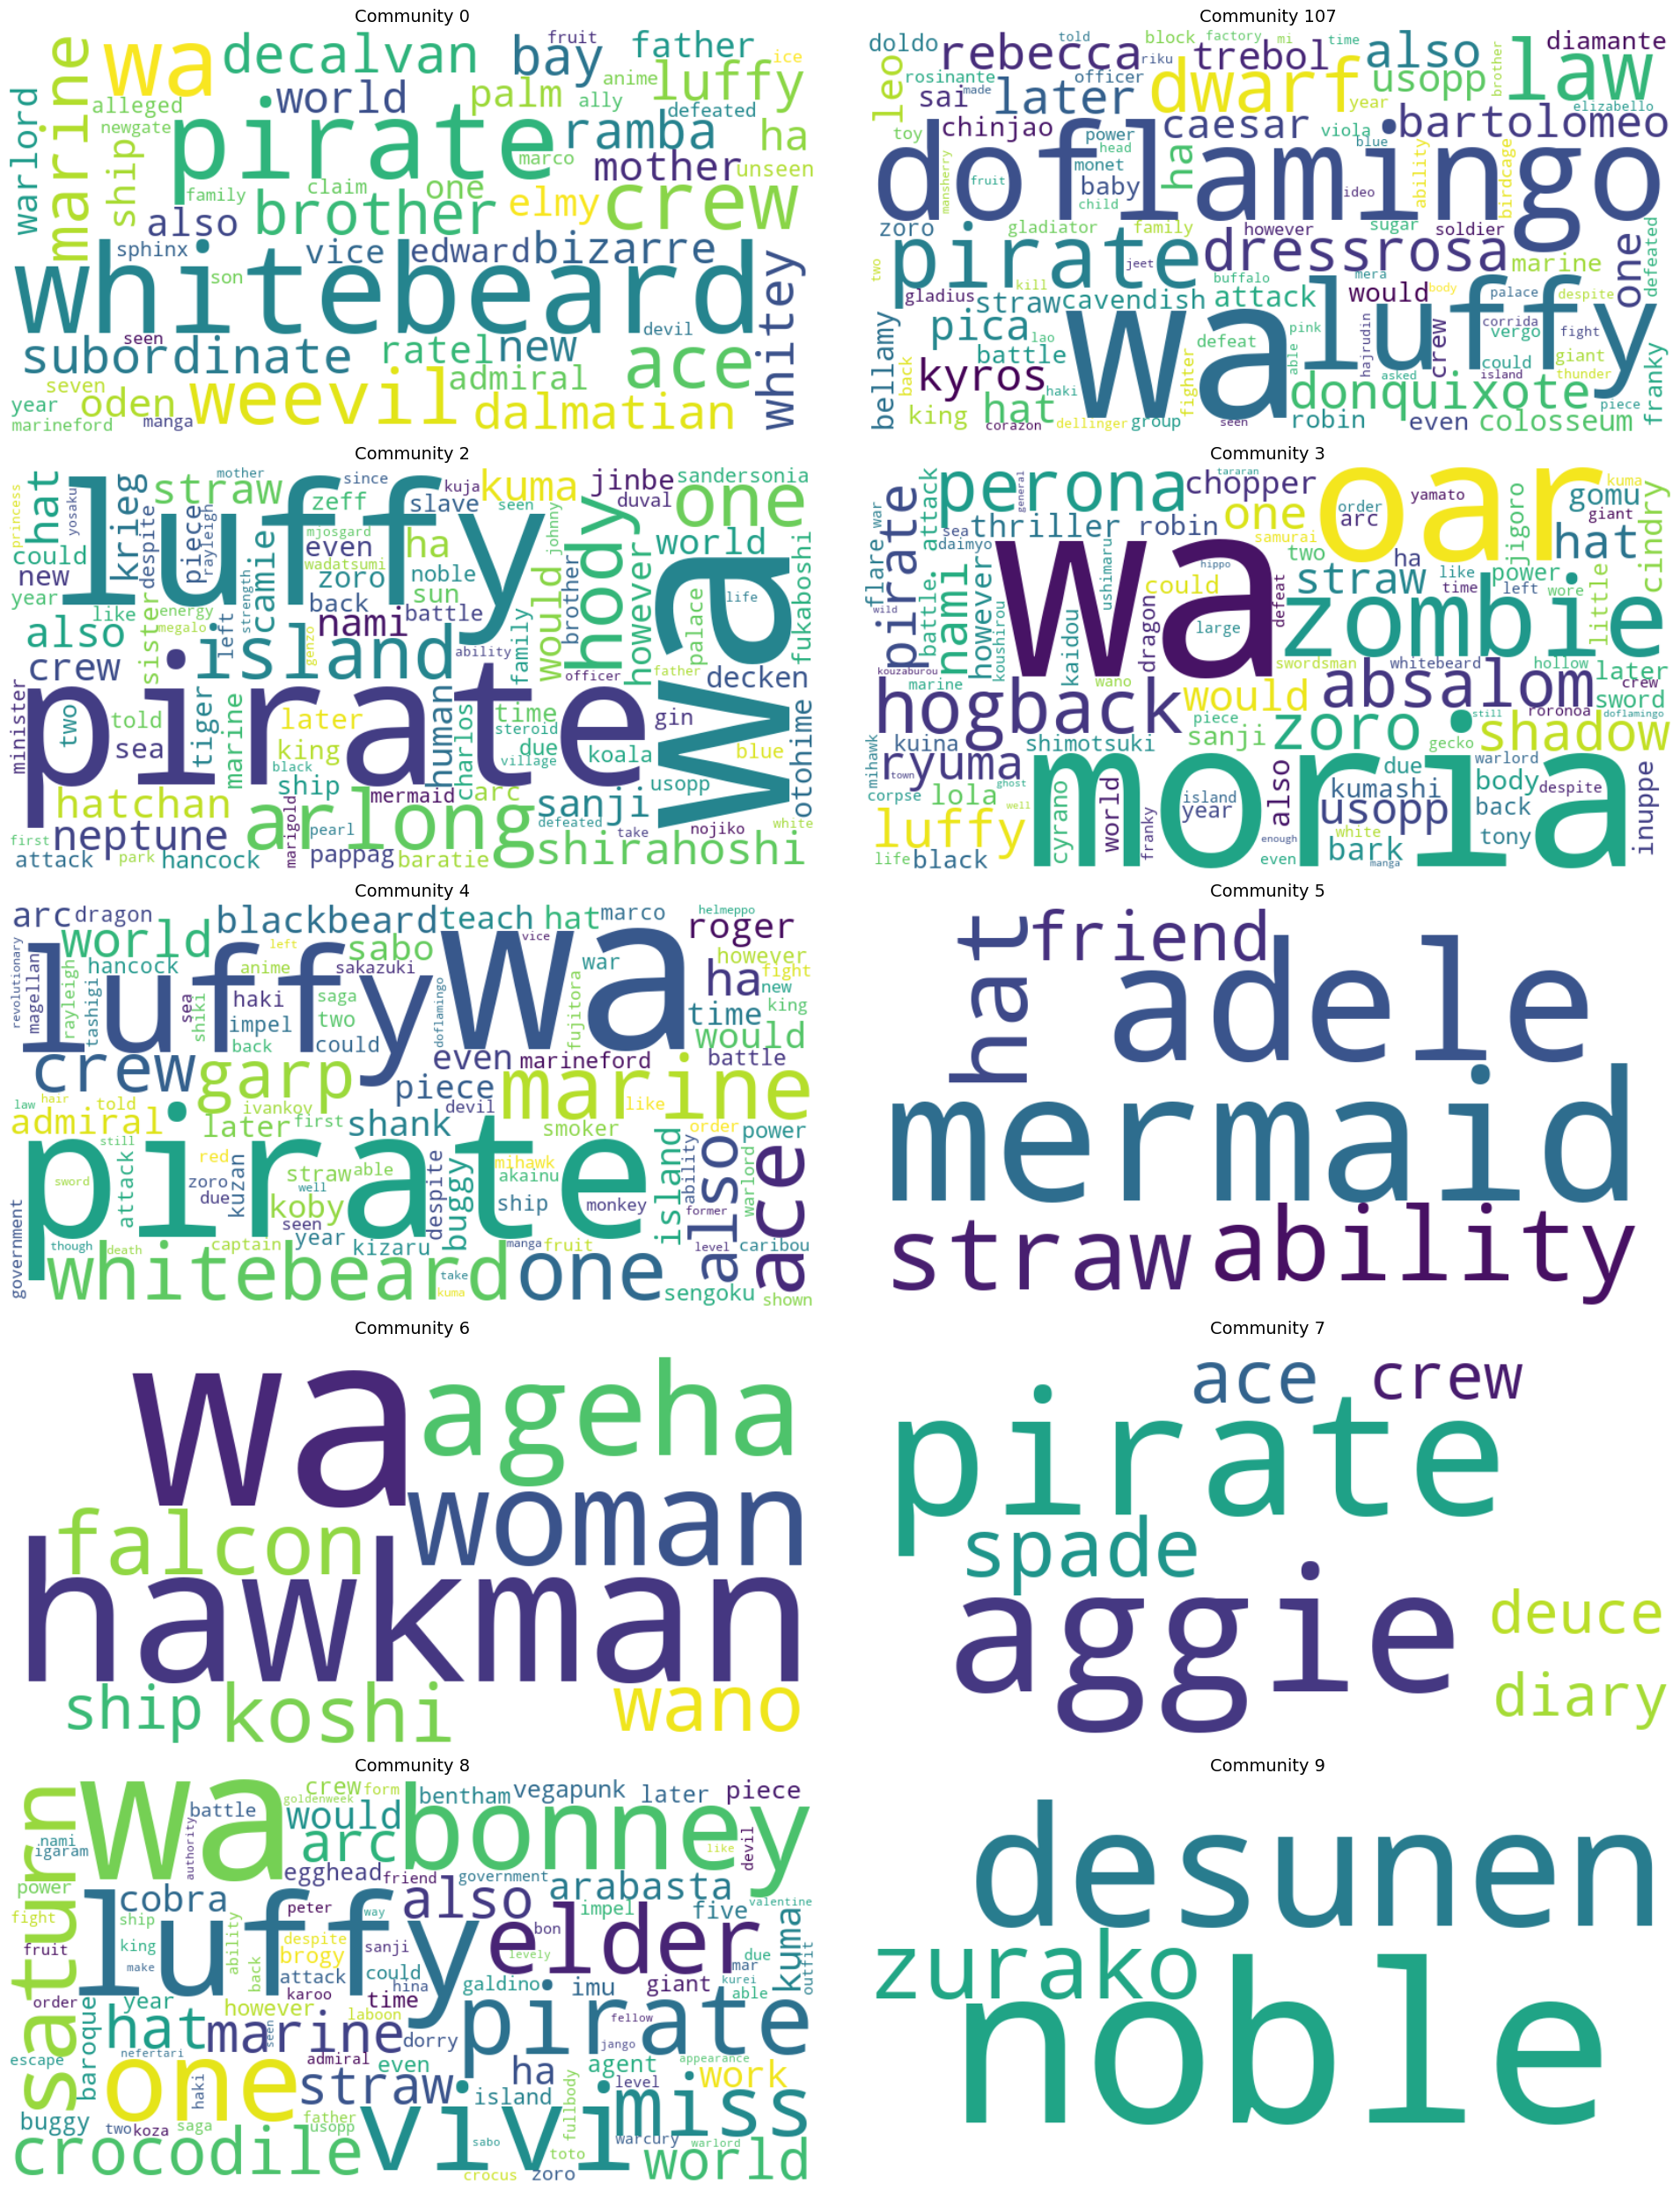

In [21]:
text_dir = r"./../onepiece_cleaned"  # Replace with your actual directory path

# Prepare content for each community
communities_content = {}
for community, members in communities_louvain.items():
    communities_content[community] = []
    for node in members:
        filename = os.path.join(text_dir, f"{node}.txt")
        if os.path.exists(filename):
            # Read and clean the content of each file
            with open(filename, 'r', encoding='utf-8') as file:
                raw_content = file.read()
                cleaned_content = " ".join(process_text(raw_content, lemmatize=True))
                communities_content[community].append(cleaned_content)

# Prepare word clouds for up to 10 communities
fig, axes = plt.subplots(5, 2, figsize=(20, 25))  # Create a 5x2 grid for subplots
axes = axes.flatten()

# Generate word clouds
for i, (community, contents) in enumerate(communities_content.items()):
    if i >= 10:  # Limit to 10 communities
        break
    
    # Merge all text content in the community
    merged_content = " ".join(contents)
    
    # Perform TF-IDF analysis
    vectorizer = TfidfVectorizer(max_features=100)  # Limit to top 100 features
    X = vectorizer.fit_transform([merged_content])
    tfidf_scores = dict(zip(vectorizer.get_feature_names_out(), X.toarray().flatten()))
    
    # Create a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(tfidf_scores)
    
    # Plot the word cloud in the corresponding subplot
    axes[i].imshow(wordcloud, interpolation="bilinear")
    axes[i].axis("off")
    axes[i].set_title(f"Community {community}", fontsize=14)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()